# Applied Deep Learning - a use case based approach to understand deep neural networks

### Umberto Michelucci

Buy the book: https://www.apress.com/us/book/9781484237892

(C) Umberto Michelucci 2018-2019 - umberto.michelucci@gmail.com 

github repository: https://github.com/Apress/applied-deep-learning

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib as mpl

# Generic matplotlib parameters for plots and figures
mpl.rcParams['figure.figsize'] = [8,5]
font = {'size'   : 16}
mpl.rc('font', **font)

In [2]:
# The data to fit
m = 30
theta0_true = 2
theta1_true = 0.5
x = np.linspace(-1,1,m)
y = theta0_true + theta1_true * x

In [3]:
X_ = x.reshape(1,30)
Y_ = y.reshape(1,30)

The data is a perfect line

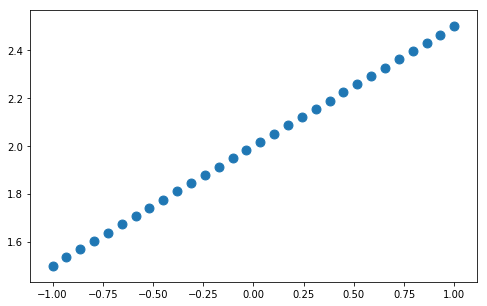

In [4]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(1, 1, 1)
ax.scatter(x,y, s = 80)

The goal of this notebook is to compare different optimizers in finding the parameters of the line, that is $w=0.5$ and $b=2.0$.

## Network building Phase

In [6]:
W1_initial = 2.5
b_initial = 1.0

n_dim = 1
tf.reset_default_graph()
tf.set_random_seed(5)

X = tf.placeholder(tf.float32, [n_dim, None])
Y = tf.placeholder(tf.float32, [1, None])
learning_rate = tf.placeholder(tf.float32, shape=())
momentum = tf.placeholder(tf.float32, shape=())

W1 = tf.Variable(tf.constant(W1_initial, shape= [1,1]))
b1 = tf.Variable(tf.constant(b_initial, shape = [1,1]) )
    
y_ = tf.matmul(W1, X) + b1 
cost = tf.reduce_mean(tf.square(y_-Y))
    
# I define here 4 optimizers node, but I will only run one each time,
# depending on the optimizer I want to test.
optimizerGD = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
optimizerAdam = tf.train.AdamOptimizer(learning_rate).minimize(cost)
optimizerMomentum = tf.train.MomentumOptimizer(learning_rate, momentum).minimize(cost)
optimizerRMSP = tf.train.RMSPropOptimizer(learning_rate, momentum).minimize(cost)
    
init = tf.global_variables_initializer()

In [7]:
def run_linear_model(training_epochs, train_obs, train_labels, debug = False, 
                     learning_r = 0.001, mom = 0.9,
                     optString = 'GD'):
    sess = tf.Session()
    sess.run(init)
    
    dispatcher = {'GD': optimizerGD, 'Adam': optimizerAdam,
                  'Momentum': optimizerMomentum, 'RMSP': optimizerRMSP}
    try:
        opt = dispatcher[optString]
    except KeyError:
        raise ValueError('Invalid optimizer')
    
    cost_history = np.empty(shape=[0], dtype = float)
    W = np.empty(shape = 0, dtype = float)
    b = np.empty(shape = 0, dtype = float)
    
    W = np.append(W, 2.5)
    b = np.append(b,1.0)
    
    feed_dict_input = {X: train_obs, Y: train_labels, learning_rate: learning_r, momentum : mom}
    for epoch in range(training_epochs+1):
        sess.run(opt, feed_dict = feed_dict_input)
        cost_ = sess.run(cost, feed_dict=feed_dict_input)
        W_ = sess.run(W1, feed_dict=feed_dict_input)
        b_ = sess.run(b1, feed_dict=feed_dict_input)
        
        
        cost_history = np.append(cost_history, cost_)
        W = np.append(W, W_)
        b = np.append(b, b_)
                
        if (epoch % 20 == 0) & debug:
            print("Reached epoch",epoch,"cost J =", str.format('{0:.6f}', cost_))
            
    return sess, cost_history, W, b

## Gradient Descent

In [9]:
sessgd, cost_gd, Woutputgd, boutputgd = run_linear_model(200, X_, Y_, 
                                                   debug = True, learning_r = 0.05, mom = 0.9, optString = 'GD')
# Let's print the best parameters found
print(Woutputgd[-1])
print(boutputgd[-1])

Reached epoch 0 cost J = 2.135525
Reached epoch 20 cost J = 0.322497
Reached epoch 40 cost J = 0.072922
Reached epoch 60 cost J = 0.017044
Reached epoch 80 cost J = 0.003992
Reached epoch 100 cost J = 0.000935
Reached epoch 120 cost J = 0.000219
Reached epoch 140 cost J = 0.000051
Reached epoch 160 cost J = 0.000012
Reached epoch 180 cost J = 0.000003
Reached epoch 200 cost J = 0.000001
0.5013607740402222
1.9999995231628418


## Adam

In [10]:
sessAd, cost_Ad, Woutputad, boutputad = run_linear_model(200, X_, Y_, 
                                                   debug = True, learning_r = 0.05, mom = 0.9, optString = 'Adam')
# Let's print the best parameters found
print(Woutputad[-1])
print(boutputad[-1])

Reached epoch 0 cost J = 2.257414
Reached epoch 20 cost J = 0.360334
Reached epoch 40 cost J = 0.044293
Reached epoch 60 cost J = 0.000604
Reached epoch 80 cost J = 0.000663
Reached epoch 100 cost J = 0.000043
Reached epoch 120 cost J = 0.000009
Reached epoch 140 cost J = 0.000001
Reached epoch 160 cost J = 0.000000
Reached epoch 180 cost J = 0.000000
Reached epoch 200 cost J = 0.000000
0.5000684261322021
1.999971628189087


# Exercise 1: plot the cost function - difficulty: easy

Plot the two cost functions, the one for the Gradient Descent and the one for the optimzer Adam. 

1. What do you notice? What is different?
2. Do a zoom around values of the cost function close to zero. What do you notice? Try the following zoom levels: ```plt.ylim(0,0.01)```, or ```plt.ylim(0,0.001)```.
3. What can you say about the final value reached by the cost function in the two cases?
4. Compare the values for ```W``` and ```b``` reached with the two algorithms. What do you notice?

# Exercise 2: compare all the optimizers - difficulty: medium

Now do the same comparison not only for GD and Adam, but also for RMSProp and Momentum. Answer the following questions

1. What is the most efficient algorithm in terms of number of epochs (which one converges faster)?
2. Compare the final values for ```W``` and ```b``` reached for the four algorithms. Which one reaches the expected values better?

# Exercise 3: compare how the converges work in parameter space

The function ```run_linear_model()``` returns also two numpy arrays that contains all the successive approximation of ```W``` and ```b```. Do a 2-dimensional plot of the approximations puttin ```W``` on the $x$-axis and ```b``` on the $y$-axis and check how the four algorithm converges. 

1. What path do they follow to reach the minimum? Check this out
2. Zoom around the expected minimum and check how the paths are different with the four different algorithms


Use a code similar to the following

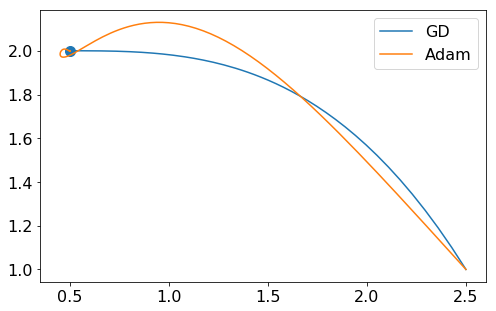

In [108]:
plt.scatter(0.5, 2.0, s= 100)
plt.plot(Woutputgd, boutputgd, label = 'GD')
plt.plot(Woutputad, boutputad, label = 'Adam')
# To change the zoom level uncomment the following lines
#plt.xlim(0.48,0.51)
#plt.ylim(1.98, 2.02)
plt.legend()

# Exercise 4: plot the cost function of all the optimizeres together - difficulty easy

Plot the cost function convergence for the four optimizers together and compare them. What do you notice?